# Exploring China's Fertality Rate

## Data preparation

In [1]:
import pandas as pd

In [39]:
# Country classification
classification = (
    pd.read_excel("CLASS.xlsx")
)

classification_dict = dict(zip(classification['Code'], classification['Income group']))

In [40]:
# Target rate
birth = (
    pd.read_csv("birth_rate.csv")
    .rename(columns={'Country Name':'country','Country Code':'code'})
    [['country','code', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021']] #2022 data is not avaliable
)

birth = (
    pd.melt(birth, id_vars=['country','code'])
    .rename(columns={
        'variable':'year',
        'value':'birth_rate_crude'
    })
    .assign(
        income_group = lambda df:df['code'].map(classification_dict)
    )
    .loc[
        lambda x:x['income_group'].notnull()
    ]
)

birth_df = (
    birth
    .loc[
        lambda x:x['year']=="2021"
    ]
    .reset_index(drop=True)
)

birth_df.head()

,country,code,year,birth_rate_crude,income_group
0,Aruba,ABW,2021,7.193,High income
1,Afghanistan,AFG,2021,35.842,Low income
2,Angola,AGO,2021,38.809,Lower middle income
3,Albania,ALB,2021,10.240,Upper middle income
4,Andorra,AND,2021,NaN,High income


### GDP

In [41]:
# Overall Economic Indicator
gdp = (
    pd.read_csv("gdp_per_capita.csv")
    .rename(columns={
        'Country Name': 'country',
        'Country Code': 'code'
    })
    [['country', 'code','1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
)

gdp = (
    pd.melt(gdp, id_vars=['country','code'])
    .rename(columns={'value':'gdp_per_capita_dollars'})
    .assign(
        income_group = lambda df:df['code'].map(classification_dict)
    )
    .loc[
        lambda x:x['income_group'].notnull()
    ]
)

gdp_df = (
    gdp
    .loc[
        lambda x: x['variable']=="2021"
    ]
)

gdp_df.head()

,country,code,variable,gdp_per_capita_dollars,income_group
16226,Aruba,ABW,2021,29127.759380,High income
16228,Afghanistan,AFG,2021,355.777826,Low income
16230,Angola,AGO,2021,1927.474078,Lower middle income
16231,Albania,ALB,2021,6377.203096,Upper middle income
16232,Andorra,AND,2021,42072.319420,High income


### Inflation

In [42]:
# Overall Economic Indicator
inflation = (
    pd.read_csv("inflation_consumer_prices.csv")
    .rename(columns={'Country Name':'country', 'Country Code':'code'})
    [['country', 'code','1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
)

inflation = (
    pd.melt(inflation, id_vars=['country','code'])
    .rename(columns={'value':'inflation_consumer_prices_perc'})
    .assign(
        income_group = lambda df:df['code'].map(classification_dict)
    )
    .loc[
        lambda x:x['income_group'].notnull()
    ]
)

inflation_df = (
    inflation
    .loc[
        lambda x:x['variable']=='2021'
    ]
)

inflation_df.head()

,country,code,variable,inflation_consumer_prices_perc,income_group
16226,Aruba,ABW,2021,NaN,High income
16228,Afghanistan,AFG,2021,NaN,Low income
16230,Angola,AGO,2021,25.754266,Lower middle income
16231,Albania,ALB,2021,2.041472,Upper middle income
16232,Andorra,AND,2021,NaN,High income


### Population

In [120]:
# population total
population = (
    pd.read_csv("fertility-rate-mortality-rate-population.csv")
    .rename(columns={
        'Entity':'country',
        'Code':'code',
        'Year':'year',
        'Population (historical estimates)':'population'
    })
    .assign(
        income_group = lambda df:df['code'].map(classification_dict)
    )
    .loc[
        lambda x:x['income_group'].notnull()
    ]
    [['country','code','year','population']]
    .reset_index(drop=True)
)

population.head()

,country,code,year,population
0,Afghanistan,AFG,1950,7480464.0
1,Afghanistan,AFG,1951,7571542.0
2,Afghanistan,AFG,1952,7667534.0
3,Afghanistan,AFG,1953,7764549.0
4,Afghanistan,AFG,1954,7864289.0


### Mitigation

In [207]:
mitigation = (
    pd.read_csv("mitigation.csv")
    .rename(columns={'Country Name':'country', 'Country Code':'code'})
    [['country', 'code','1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
)

mitigation_china = (
    pd.melt(mitigation, id_vars=['country','code'])
    .rename(columns={'value':'mitigation'})
    .loc[
        lambda x:x['country']=="China"
    ]
    .reset_index(drop=True)
    .assign(
        countryId = lambda df:df['country'] + df['variable']
    )
)

mitigation_china.head()

,country,code,variable,mitigation,countryId
0,China,CHN,1960,-118519.0,China1960
1,China,CHN,1961,-179064.0,China1961
2,China,CHN,1962,-219144.0,China1962
3,China,CHN,1963,-219686.0,China1963
4,China,CHN,1964,-183384.0,China1964


### Sex ratio

In [209]:
sex = (
    pd.read_csv("sex ratio.csv")
    .rename(columns={
        'Country Name':'country',
        'Country Code':'code',
        'Year':'year',
        'Value':'sex_ratio'
    })
    [['country','code','year','sex_ratio']]
    .reset_index(drop=True)
)

sex_china = (
    sex
    .loc[
        lambda x:x['country']=='China'
    ]
    .reset_index(drop=True)
    .assign(
        countryId = lambda df:df['country'] + df['year'].astype(str)
    )
)

sex_china.head()

,country,code,year,sex_ratio,countryId
0,China,CHN,2021,1.118,China2021
1,China,CHN,2020,1.123,China2020
2,China,CHN,2019,1.129,China2019
3,China,CHN,2018,1.134,China2018
4,China,CHN,2017,1.140,China2017


### Schooling days

In [121]:
# Personal factors

# female education attainment %
# too many unavaliable data, drop this factor
education = (
    pd.read_csv("Educational attainment by level of education, cumulative (% population 25+).csv")
    .loc[
        lambda df:df['Indicator Name'].str.contains("female")
    ]
    .rename(columns={
        'Country Name':'country',
        'Country Code':'code',
        'Year':'year',
        'Value':'value'
    })
    [['Indicator Name','country','code','year','value']]
)

bachelor = (
    education
    .loc[
        lambda df:df['Indicator Name'].str.contains("Bachelor")
    ]
    .rename(columns={'value':'bachelor_female_perc'})
    .drop(columns='Indicator Name')
    .reset_index(drop=True)
)

master = (
    education
    .loc[
        lambda df:df['Indicator Name'].str.contains("Master")
    ]
    .rename(columns={'value':'master_female_perc'})
    .drop(columns='Indicator Name')
    .reset_index(drop=True)
)

doctoral = (
    education
    .loc[
        lambda df:df['Indicator Name'].str.contains("Doctoral")
    ]
    .rename(columns={'value':'doctoral_female_perc'})
    .drop(columns='Indicator Name')
    .reset_index(drop=True)
)

In [122]:
# female education years

schooling = (
    pd.read_csv("womens-educational-attainment-vs-fertility.csv")
    .rename(columns={
        'Combined - average years of education for 15-64 years female youth and adults':'years_of_schooling_female',
        'Entity':'country',
        'Code':'code',
        'Year':'year',
    })
    .assign(
        income_group = lambda df:df['code'].map(classification_dict)
    )
    [['country','code','year','years_of_schooling_female','income_group']]
    .loc[
        lambda x:x['income_group'].notnull()
    ]
    .reset_index(drop=True)
)

schooling.head()

,country,code,year,years_of_schooling_female,income_group
0,Afghanistan,AFG,1950,0.08,Low income
1,Afghanistan,AFG,1951,NaN,Low income
2,Afghanistan,AFG,1952,NaN,Low income
3,Afghanistan,AFG,1953,NaN,Low income
4,Afghanistan,AFG,1954,NaN,Low income


In [46]:
print(len(schooling))
print("Countries with nan data in years of schooling: ", len(schooling[schooling['years_of_schooling_female'].isnull()]))

215
Countries with nan data in years of schooling:  71


### Female labor force participation

In [166]:
# # labor force participation - 15+ female %
# labor = (
#     pd.read_csv("labor force participation.csv")
#     .loc[
#         lambda x: x['Indicator Name'] == 'Labor force participation rate, female (% of female population ages 15+) (national estimate)'
#     ]
#     .rename(columns={
#         'Country Name':'country',
#         'Country Code':'code',
#         'Year':'year',
#         'Value':'labor_force_participation'
#     })
#     .assign(
#         income_group = lambda df:df['code'].map(classification_dict)
#     )
#     .loc[
#         lambda x:x['income_group'].notnull()
#     ]
#     [['country','code','year','labor_force_participation']]
#     .reset_index(drop=True)
# )

# labor.head()

In [202]:
labor = (
    pd.read_csv("labor force participation.csv")
    .rename(columns={'Country Name':'country', 'Country Code':'code'})
    [['country', 'code','1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
)

labor_china=(
    pd.melt(labor, id_vars=['country', 'code'])
    .rename(columns={'variable':'year', 'value':'female_labor_participation'})
    .loc[
        lambda x:x['country']=='China'
    ]
    .assign(
        countryId = lambda x:x['country'] + x['year']
    )
)

labor_china.head()

,country,code,year,female_labor_participation,countryId
40,China,CHN,1960,NaN,China1960
306,China,CHN,1961,NaN,China1961
572,China,CHN,1962,NaN,China1962
838,China,CHN,1963,NaN,China1963
1104,China,CHN,1964,NaN,China1964


### Paid leave, female (data unavaliable)

In [173]:
# female paid leave (calendar days)

leave = (
    pd.read_csv("Length of paid leave (calendar days)_female .csv")
    .rename(columns={
        'Economy':'country',
        'Economy Code':'code',
        'Year':'year',
        'Length of paid maternity leave (calendar days)':'paid_leave'
    })
    .assign(
        income_group = lambda df:df['code'].map(classification_dict)
    )
    .loc[
        lambda x:x['income_group'].notnull()
    ]
)

print("We have a total of " + str(len(leave)) + " days, of which " + str(len(leave[leave['paid_leave'].isnull()])) + " countries don't have avaliable data.")
leave.head()

We have a total of 216 days, of which 28 countries don't have avaliable data.


,country,year,code,paid_leave,income_group
0,Aruba,2023,ABW,NaN,High income
1,Afghanistan,2023,AFG,90.0,Low income
2,Angola,2023,AGO,90.0,Lower middle income
3,Albania,2023,ALB,365.0,Upper middle income
4,Andorra,2023,AND,NaN,High income


Not enough data for China

### Mean age at first marriage (data unavaliable)

In [174]:
# mean age at first marriage, female

marriage = (
    pd.read_csv("Mean age at first marriage.csv")
    .rename(columns={
        'Country Name':'country',
        'Country Code':'code',
        'Year': 'year',
        'Value':'mean_age_marriage'
    })
    .loc[
        lambda x:x['year']==2010
    ]
    .loc[
        lambda x:x['Disaggregation']=='female'
    ]
    [['country','year','mean_age_marriage']]
)

marriage.head()

,country,year,mean_age_marriage
2,Afghanistan,2010,21.5
28,Argentina,2010,24.6
34,Armenia,2010,24.5
38,Aruba,2010,28.5
86,"Bahamas, The",2010,27.9


Not enough data for China

## Compare birth rate

### Birth rate vs. Country economic development

In [50]:
gdp_2021 = gdp[gdp['variable']=='2021']
gdp_2021_dict = dict(zip(gdp_2021['code'], gdp_2021['gdp_per_capita_dollars']))


birth_2021 = (
    birth[birth['year']=="2021"]
    .loc[
        lambda x:x['birth_rate_crude'].notnull() # 4 countries data unavaliable
    ]
    .assign(
        gdp_per_capita = lambda df:df['code'].map(gdp_2021_dict)
    )
    .reset_index(drop=True)
)

A common idea I had is that one country's birth rate has something to do with its economic development level - the richer the country is, the lower birth rate it has. 

In [51]:
birth_2021_mean = birth_2021.groupby('income_group')['birth_rate_crude'].mean().reset_index()
birth_2021_mean['income_group'] = pd.Categorical(birth_2021_mean['income_group'], ['Low income','Lower middle income', 'Upper middle income', 'High income'])
birth_2021_mean.sort_values("income_group").reset_index(drop=True)

,income_group,birth_rate_crude
0,Low income,33.786038
1,Lower middle income,24.511870
2,Upper middle income,15.897889
3,High income,11.009280


As shown above, the mean of birth rate does get lower as the income gets higher. 

Text(4617.5051, 6.319999999999999, 'China')

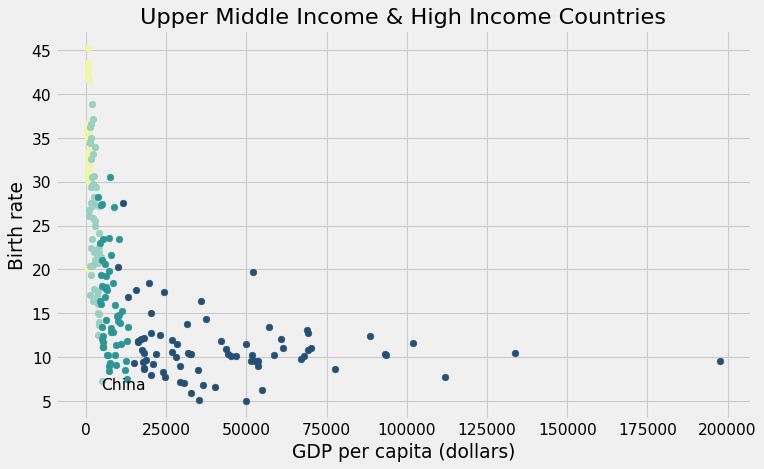

In [52]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

figure(figsize=(10, 6), dpi=80)

low_income_countries = (
    birth_2021[birth_2021['income_group']=='Low income']
    .reset_index(drop=True)
)

lower_middle_countries = (
    birth_2021[birth_2021['income_group']=='Lower middle income']
    .reset_index(drop=True)
)

upper_middle_countries = (
    birth_2021[birth_2021['income_group']=='Upper middle income']
    .reset_index(drop=True)
)

high_income_countries = (
    birth_2021[birth_2021['income_group']=='High income']
    .reset_index(drop=True)
)

# fig, ax = plt.subplots()
plt.scatter(low_income_countries['gdp_per_capita'], low_income_countries['birth_rate_crude'], c="#F1F5A8")

plt.scatter(lower_middle_countries['gdp_per_capita'], lower_middle_countries['birth_rate_crude'], c="#9AD0C2")

plt.scatter(upper_middle_countries['gdp_per_capita'], upper_middle_countries['birth_rate_crude'], c="#2D9596")

plt.scatter(high_income_countries['gdp_per_capita'], high_income_countries['birth_rate_crude'], c="#265073")

plt.title("Upper Middle Income & High Income Countries")
plt.xlabel("GDP per capita (dollars)")
plt.ylabel("Birth rate")

plt.annotate("China", (upper_middle_countries['gdp_per_capita'][10]-8000,upper_middle_countries['birth_rate_crude'][10]-1.2))

# for i, txt in enumerate(upper_middle_countries['country'].tolist()):
#     plt.annotate(txt, (upper_middle_countries['gdp_per_capita'][i]-200,upper_middle_countries['birth_rate_crude'][i]+0.3))

As shown above, overall, the countries with higher GDP per capita has lower birth rate. Is the difference statistically significant? We will set the **null hypothesis as the mean of birth rates among these four income level country groups are the same**.

We will be using ANOVA test.

In [56]:
import numpy as np
from scipy.stats import f_oneway

low_income = birth_2021[birth_2021['income_group']=='Low income']['birth_rate_crude']
lower_middle = birth_2021[birth_2021['income_group']=='Lower middle income']['birth_rate_crude']
upper_middle = birth_2021[birth_2021['income_group']=='Upper middle income']['birth_rate_crude']
high_income = birth_2021[birth_2021['income_group']=='High income']['birth_rate_crude']

f_oneway(low_income, lower_middle, upper_middle, high_income)

F_onewayResult(statistic=129.45654601837344, pvalue=2.485840375967597e-47)

As shown above, the p-value obtained from ANOVA analysis is way smaller than 0.05, the level of significance. And the f-value is also large enough. Therefore, we can reject the null hypothesis and conclude that there are significant differences among the means of birth rates of different income level country groups.

### China vs. Other Asian countries

According to the scatterplot above, China's birth rate is even lower than many high income countries, even though it is a upper middle income country. To better observe how fast China's birth rate is dropping, we can compare it with other Asian countries. Here I picked Japan, Korea, which shares similar culture background with China, and India, which recently surpassed China to be the most populated country.

In [93]:
def drawBirthRate(keyword, colorName):
    birth_rate = (
        birth[birth['country']==keyword]
        .assign(
            year = lambda df:df['year'].astype(float)
        )
        .loc[
            lambda x:x['year']>=1984
        ]
    )
    
    plt.plot(birth_rate['year'], birth_rate['birth_rate_crude'], color=colorName, label=keyword)
    plt.xlabel("Year")
    plt.ylabel("Birth rate")
    plt.legend()
    plt.title(keyword + " Birth Rate over the Years")
    
def countBirthChange(keyword):
    birth_rate = (
        birth[birth['country']==keyword]
        .assign(
            year = lambda df:df['year'].astype(float)
        )
        .loc[
            lambda x:x['year']>=1984
        ]
        .reset_index(drop=True)
    )
    
    birth_rate_1 = birth_rate['birth_rate_crude'][0]
    birth_rate_2 = birth_rate['birth_rate_crude'][37]
    birth_change = (birth_rate_2 - birth_rate_1)/birth_rate_1
    
    return birth_change

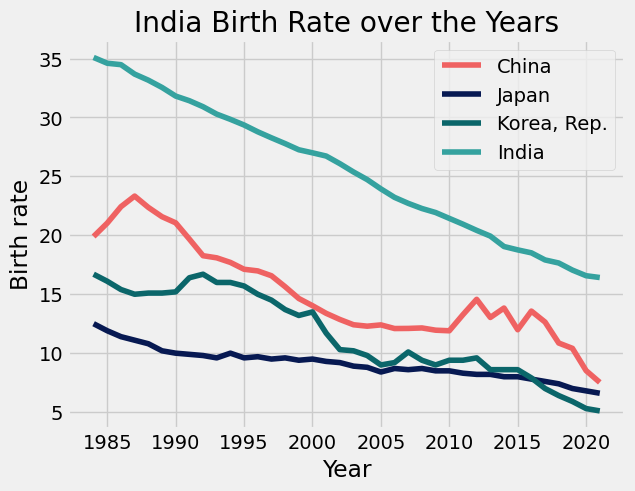

In [111]:
asian_country_list = ['China', 'Japan', 'Korea, Rep.', 'India']
color_palette = ['#EF6262','#071952','#0B666A','#35A29F']
for a, b in zip(asian_country_list, color_palette):
    drawBirthRate(a,b)

In [98]:
for item in asian_country_list:
    result = countBirthChange(item)
    print(item + ": " + str(round(result,3)))

China: -0.622
Japan: -0.472
Korea, Rep.: -0.695
India: -0.532


As shwon above, all four countries are experiencing a drop in birth rate over the recent 20 years. The question is: are their birth rate drop statistically different?

In [109]:
from scipy import stats

compare_country='Japan'

stats.ttest_ind(birth[ (birth['country']=="Japan") & (birth['year']!="2022") ]['birth_rate_crude'], birth[ (birth['country']=='China') & (birth['year']!="2022") ]['birth_rate_crude'])

Ttest_indResult(statistic=-6.5710642575386276, pvalue=1.295805987212172e-09)

In [108]:
compare_country='Korea, Rep.'

stats.ttest_ind(birth[ (birth['country']=="Korea, Rep.") & (birth['year']!="2022") ]['birth_rate_crude'], birth[ (birth['country']=='China') & (birth['year']!="2022") ]['birth_rate_crude'])

Ttest_indResult(statistic=-0.8908774730792868, pvalue=0.37474845573835436)

In [107]:
compare_country='India'

stats.ttest_ind(birth[ (birth['country']=="India") & (birth['year']!="2022") ]['birth_rate_crude'], birth[ (birth['country']=='China') & (birth['year']!="2022") ]['birth_rate_crude'])

Ttest_indResult(statistic=7.20932857821619, pvalue=5.136752622836759e-11)

Hence, even though all of them see a drop in the birth rate, China's percentage change is statistically different from that of Japan and India.

## Factors contribute to China's Birth Rate

**Question:** What factors are actually influencing the birth rate? Here I want to build a regression model to observe the potential relationships.

In [203]:
gdp_china = (
    gdp
    .loc[
        lambda x:x['country']=='China'
    ]
    .rename(columns={'variable':'year'})
    .reset_index(drop=True)
    .assign(
        countryId = lambda df:df['country'] + df['year']
    )
)
#gdp_china.head() 

In [204]:
inflation_china = (
    inflation
    .loc[
        lambda x:x['country']=='China'
    ]
    .reset_index(drop=True)
    .rename(columns={'variable':'year'})
    .assign(
        countryId = lambda df:df['country'] + df['year']
    )
)

#inflation_china.head()

In [205]:
population_china = (
    population
    .loc[
        lambda x:x['country']=='China'
    ]
    .reset_index(drop=True)
    .assign(
        countryId = lambda df:df['country'] + df['year'].astype(str)
    )
)

#population_china.head()

In [206]:
schooling_china = (
    schooling
    .loc[
        lambda x:x['country']=='China'
    ]
    .reset_index(drop=True)
    .sort_values(by='year', ascending=False)
    .loc[
        lambda x:x['year']>=1960
    ]
    .assign(
        countryId = lambda df:df['country'] + df['year'].astype(str)
    )
)
#schooling_china.head()

In [216]:
gdp_dict = dict(zip(gdp_china['countryId'], gdp_china['gdp_per_capita_dollars']))
inflation_dict = dict(zip(inflation_china['countryId'], inflation_china['inflation_consumer_prices_perc']))
population_dict = dict(zip(population_china['countryId'], population_china['population']))
mitigation_dict = dict(zip(mitigation_china['countryId'], mitigation_china['mitigation']))
sex_dict = dict(zip(sex_china['countryId'], sex_china['sex_ratio']))
schooling_dict = dict(zip(schooling_china['countryId'], schooling_china['years_of_schooling_female']))
labor_dict = dict(zip(labor_china['countryId'], labor_china['female_labor_participation']))

In [239]:
birth_china = (
    birth[birth['country']=='China']
    .reset_index(drop=True)
    .assign(
        countryId = lambda df:df['country'] + df['year'],
        gdp = lambda df:df['countryId'].map(gdp_dict), #gdp per capita
        inflation = lambda df:df['countryId'].map(inflation_dict),
        population = lambda df:df['countryId'].map(population_dict),
        mitigation = lambda df:df['countryId'].map(mitigation_dict),
        sex_ratio = lambda df:df['countryId'].map(sex_dict),
        schooling = lambda df:df['countryId'].map(schooling_dict),
        labor = lambda df:df['countryId'].map(labor_dict),  
        year = lambda df:df['year'].astype(int)
    )
    .drop('countryId', axis=1)
    .drop('income_group', axis=1)
    .loc[
        lambda x:x['year']>=1980
    ]
)
birth_china.head()

,country,code,year,birth_rate_crude,gdp,inflation,population,mitigation,sex_ratio,schooling,labor
20,China,CHN,1980,18.21,312.020377,NaN,9.823725e+08,-20131.0,1.071,5.0,NaN
21,China,CHN,1981,20.91,291.358237,NaN,9.972595e+08,-28017.0,1.073,NaN,NaN
22,China,CHN,1982,22.28,281.499334,NaN,1.013483e+09,-36185.0,1.075,NaN,NaN
23,China,CHN,1983,20.19,297.807023,NaN,1.029227e+09,-43762.0,1.078,NaN,NaN
24,China,CHN,1984,19.90,302.585825,NaN,1.044172e+09,-51959.0,1.081,NaN,NaN


In [241]:
# check NA values in each column
print(len(birth_china))
birth_china.isna().sum()

42


country              0
code                 0
year                 0
birth_rate_crude     0
gdp                  0
inflation            7
population           0
mitigation           0
sex_ratio            0
schooling           33
labor               11
dtype: int64

In [242]:
# Feature Engineering 
# imputing missing values with median
birth_china2 = (
    birth_china
    .loc[
        lambda df:df['birth_rate_crude'].notnull() # remove the rows where target value is NA
    ]
    .assign(
        inflation = lambda df:df['inflation'].fillna(df['inflation'].median()),
        schooling = lambda df:df['schooling'].fillna(df['schooling'].median()),
        labor = lambda df:df['labor'].fillna(df['labor'].median())
    )
    .reset_index(drop=True)
)

birth_china2.head()

,country,code,year,birth_rate_crude,gdp,inflation,population,mitigation,sex_ratio,schooling,labor
0,China,CHN,1980,18.21,312.020377,2.62105,9.823725e+08,-20131.0,1.071,5.00,72.64
1,China,CHN,1981,20.91,291.358237,2.62105,9.972595e+08,-28017.0,1.073,7.14,72.64
2,China,CHN,1982,22.28,281.499334,2.62105,1.013483e+09,-36185.0,1.075,7.14,72.64
3,China,CHN,1983,20.19,297.807023,2.62105,1.029227e+09,-43762.0,1.078,7.14,72.64
4,China,CHN,1984,19.90,302.585825,2.62105,1.044172e+09,-51959.0,1.081,7.14,72.64


In [ ]:
# But too many values are missing, lets remove the 

# remove outliers

### Explore correlation

In [243]:
# explore the correlation between each factor and birth rate
def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

The correlation between birth rate and gdp is -0.73 . Very strong correlation.


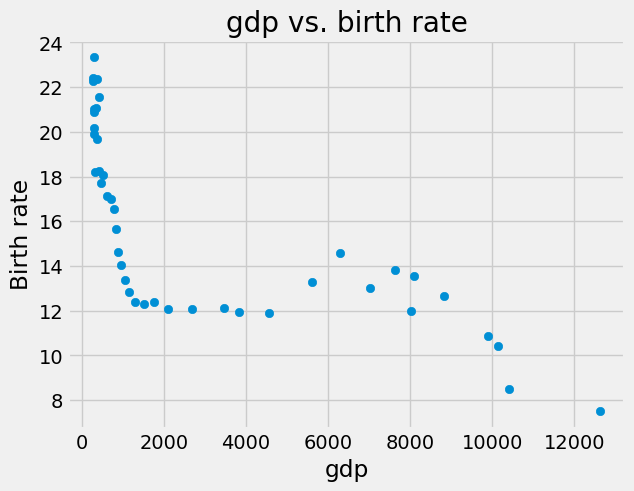

In [247]:
keyword="gdp"

gdp_birth_corr = Pearson_correlation(birth_china2[keyword], birth_china2['birth_rate_crude'])

plt.scatter(birth_china2[keyword], birth_china2['birth_rate_crude'])
plt.title( keyword + " vs. birth rate")
plt.xlabel(keyword)
plt.ylabel("Birth rate")

print("The correlation between birth rate and gdp is " + str(round(gdp_birth_corr,2)) + " . Very strong correlation.")

The correlation between birth rate and inflation is 0.4 . Not very strong correlation.


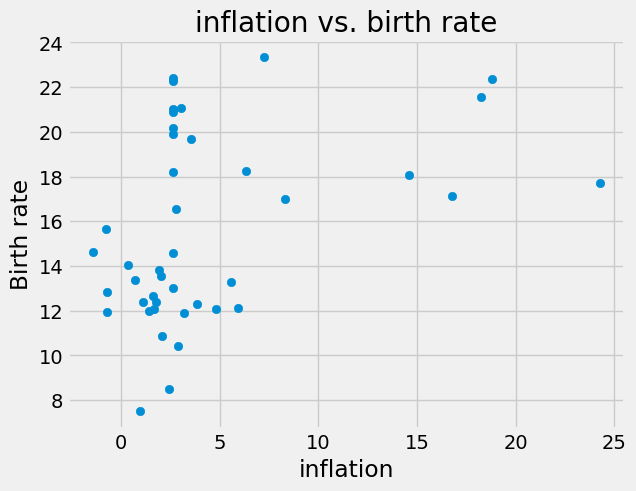

In [248]:
keyword = "inflation"

correlation = Pearson_correlation(birth_china2[keyword], birth_china2['birth_rate_crude'])

plt.scatter(birth_china2[keyword], birth_china2['birth_rate_crude'])
plt.title( keyword + " vs. birth rate")
plt.xlabel(keyword)
plt.ylabel("Birth rate")

print("The correlation between birth rate and " + keyword + " is " + str(round(correlation,2)) + " . Not very strong correlation.")

The correlation between birth rate and population is -0.9 . Very strong correlation.


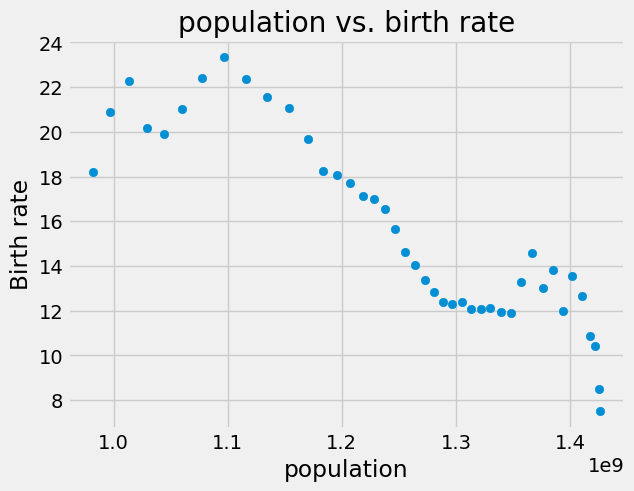

In [250]:
keyword = "population"

correlation = Pearson_correlation(birth_china2[keyword], birth_china2['birth_rate_crude'])

plt.scatter(birth_china2[keyword], birth_china2['birth_rate_crude'])
plt.title( keyword + " vs. birth rate")
plt.xlabel(keyword)
plt.ylabel("Birth rate")

print("The correlation between birth rate and " + keyword + " is " + str(round(correlation,2)) + " . Very strong correlation.")

The correlation between birth rate and mitigation is 0.06 . Not very strong correlation.


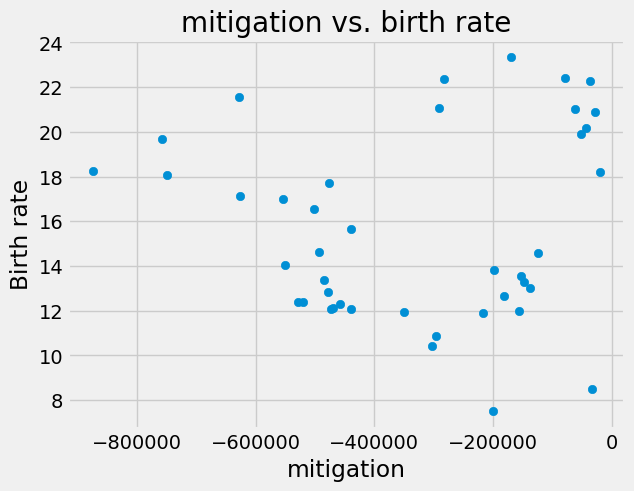

In [257]:
keyword = "mitigation"

correlation = Pearson_correlation(birth_china2[keyword], birth_china2['birth_rate_crude'])

plt.scatter(birth_china2[keyword], birth_china2['birth_rate_crude'])
plt.title( keyword + " vs. birth rate")
plt.xlabel(keyword)
plt.ylabel("Birth rate")

print("The correlation between birth rate and " + keyword + " is " + str(round(correlation,2)) + " . Not very strong correlation.")

The correlation between birth rate and sex_ratio is -0.68 . Fairly strong correlation.


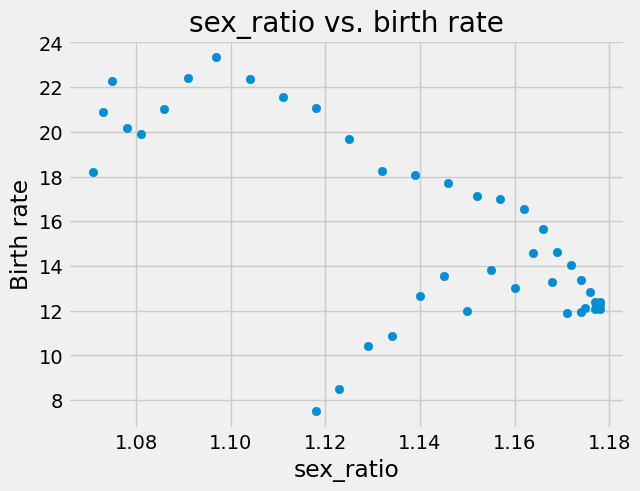

In [260]:
keyword = "sex_ratio"
# sex ratio is male births vs. female births

correlation = Pearson_correlation(birth_china2[keyword], birth_china2['birth_rate_crude'])

plt.scatter(birth_china2[keyword], birth_china2['birth_rate_crude'])
plt.title( keyword + " vs. birth rate")
plt.xlabel(keyword)
plt.ylabel("Birth rate")

print("The correlation between birth rate and " + keyword + " is " + str(round(correlation,2)) + " . Fairly strong correlation.")

The correlation between birth rate and schooling is -0.41 . Not very strong correlation. Also the result has been largely affected by the imputed missing value.


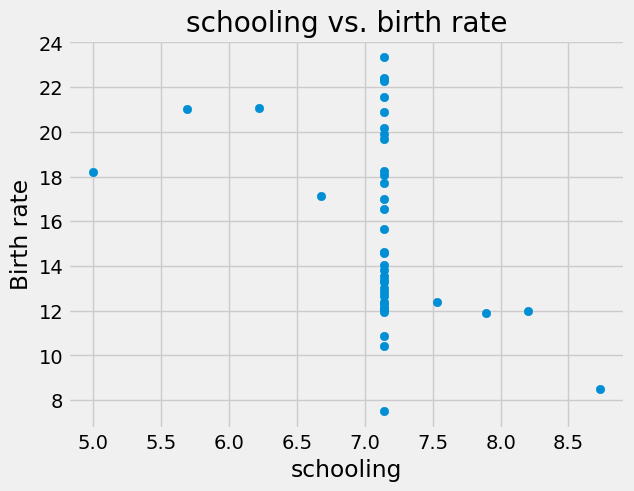

In [252]:
keyword = "schooling"

correlation = Pearson_correlation(birth_china2[keyword], birth_china2['birth_rate_crude'])

plt.scatter(birth_china2[keyword], birth_china2['birth_rate_crude'])
plt.title( keyword + " vs. birth rate")
plt.xlabel(keyword)
plt.ylabel("Birth rate")

print("The correlation between birth rate and " + keyword + " is " + str(round(correlation,2)) + " . Not very strong correlation. Also the result has been largely affected by the imputed missing value.")

The correlation between birth rate and labor is 0.35. Not strong correlation.


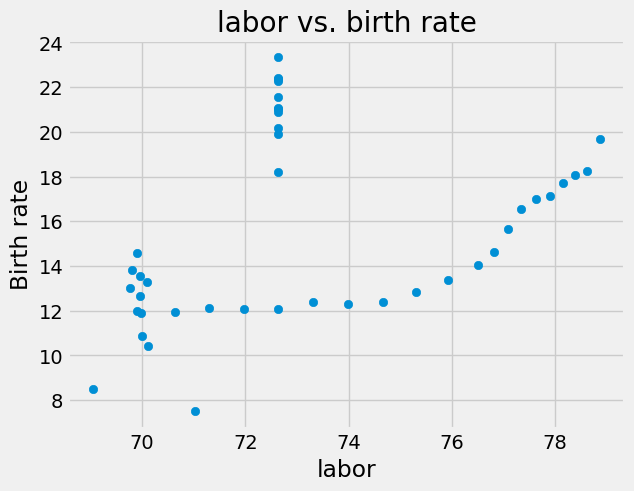

In [255]:
keyword = "labor"

correlation = Pearson_correlation(birth_china2[keyword], birth_china2['birth_rate_crude'])

plt.scatter(birth_china2[keyword], birth_china2['birth_rate_crude'])
plt.title( keyword + " vs. birth rate")
plt.xlabel(keyword)
plt.ylabel("Birth rate")

print("The correlation between birth rate and " + keyword + " is " + str(round(correlation,2)) + ". Not strong correlation.")

The correlation between GDP and leave is -0.17 . A fairly strong population (but the data is bad)


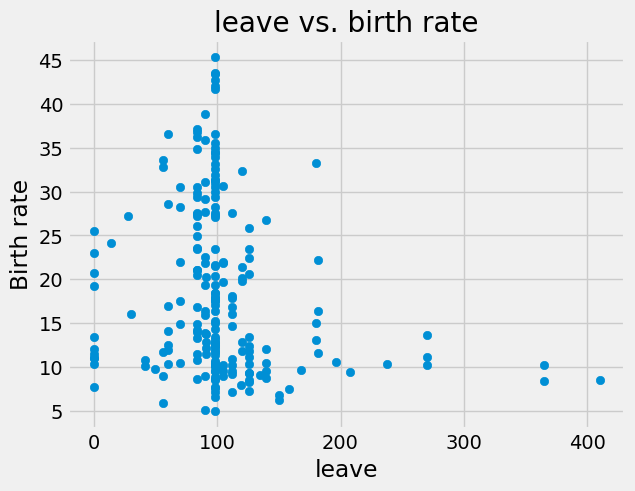

In [305]:
keyword = "leave"

correlation = Pearson_correlation(birth_factors2[keyword], birth_factors2['birth_rate_crude'])

plt.scatter(birth_factors2[keyword], birth_factors2['birth_rate_crude'])
plt.title( keyword + " vs. birth rate")
plt.xlabel(keyword)
plt.ylabel("Birth rate")

print("The correlation between GDP and " + keyword + " is " + str(round(correlation,2)) + " . A fairly strong population (but the data is bad)")

<Axes: >

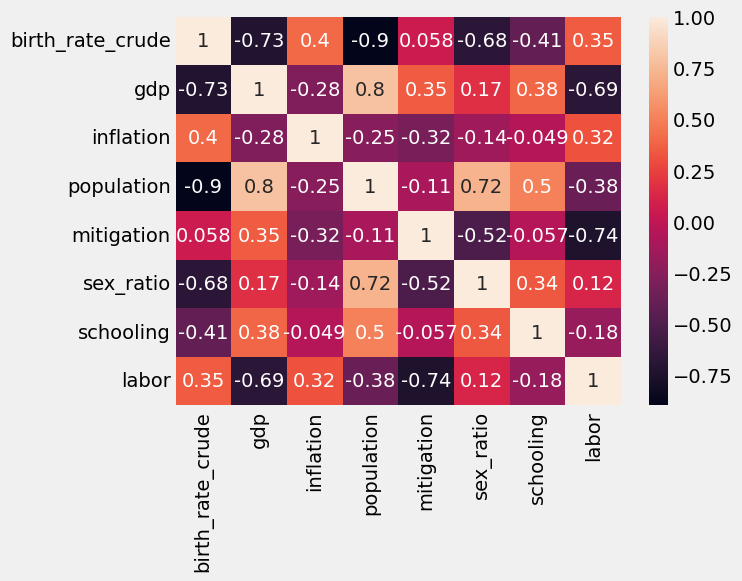

In [284]:
import seaborn as sns

birth_china3 = (
    birth_china2   [['birth_rate_crude','gdp','inflation','population','mitigation','sex_ratio','schooling','labor']]
)

sns.heatmap(birth_china3.corr(), annot=True)

### Build regression model

Since the dataset size is already quite limited, and for demonstration purpose, we won't split it into train and test sets.

In [315]:
# recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

x = birth_china3.loc[:, birth_china3.columns!='birth_rate_crude']
y = birth_china3.loc[:, birth_china3.columns=='birth_rate_crude']

lin = LinearRegression()
rfe = RFE(lin, step = 6)
rfe = rfe.fit(x, y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False]
[2 1 2 2 1 1 2]


In [333]:
import statsmodels.api as st
lin = LinearRegression()
lin.fit(x, y)

LinearRegression()

In [336]:
model = LinearRegression().fit(x,y)
r_sq = model.score(x,y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8765957251148935


**Reference**:  
https://ourworldindata.org/fertility-rate

**Data Sources**:  
GDP - https://data.worldbank.org/indicator/NY.GDP.MKTP.CD  
GDP per capita - https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=CN  
Fertility rate - https://ourworldindata.org/grapher/fertility-vs-child-mortality?time=1962  
Mortality rate - https://ourworldindata.org/grapher/fertility-vs-child-mortality?time=1962  
Population - https://ourworldindata.org/grapher/fertility-vs-child-mortality?time=1962  
Wage and Salaried workers, male % - https://data.worldbank.org/indicator/SL.EMP.WORK.MA.ZS  
Wage and Salaried workers, female % - https://data.worldbank.org/indicator/SL.EMP.WORK.FE.ZS  
Labor force participation, % - https://data.worldbank.org/indicator/SL.TLF.ACTI.FE.ZS?locations=CN  
Birth rate - https://data.worldbank.org/indicator/SP.DYN.CBRT.IN  
Parental Paid Leave - https://genderdata.worldbank.org/indicators/sh-leve  
Mean age at first marriage - https://genderdata.worldbank.org/indicators/sp-dyn-smam/  
Educational attainment - https://genderdata.worldbank.org/indicators/se-cuat-zs/?education=At%20least%20Bachelor%27s%20or%20equivalent  
GDP inflation prices - https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?view=chart  
Contraceptive prevelance - https://data.worldbank.org/indicator/SP.DYN.CONU.ZS?view=chart  
Country Income Classification - https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups
